In [1]:
# IMPORTS
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy.optimize import curve_fit
%matplotlib inline
import numpy as np
import pandas as pd
from numpy import trapz
import time as time
import sys

## Import data

In [2]:
# READ DATA
tic = time.time()

# fname_thick = 'GEANT4_output/Tracking_1e5n_CutGas10um_CutSolid50nm_SymmetricDeposition_09umMylar.txt';
# fname_thick = 'GEANT4_output/Tracking_1e6n_CutGas10um_CutSolid50nm_OneSideDeposition_1umB4C_1mmZchamber.txt';
fname_thick = 'GEANT4_output/Tracking_1e6n_CutGas10um_CutSolid50nm_OneSideDeposition_09umMylar.txt';

data_detThick = pd.read_csv(fname_thick,
                names=['eventID', 'det', 'PID', 'E', 'xpos', 'ypos', 'zpos', 'dE', 'dx', 'dy','dz', 'dr','dx_cum', 'dy_cum','dz_cum', 'dr_cum'],
#                 usecols=[0,1,2,3,4,5,6,7,8,11,12,15],
                usecols=[0,1,2,3,4,7,15],
                sep='\t');


# data_detCoinc = data_detThick;

fname_coinc = 'GEANT4_output/Tracking_1e6n_CutGas10um_CutSolid50nm_SymmetricDeposition_09umMylar.txt';
data_detCoinc = pd.read_csv(fname_coinc,
                names=['eventID', 'det', 'PID', 'E', 'xpos', 'ypos', 'zpos', 'dE', 'dx', 'dy','dz', 'dr','dx_cum', 'dy_cum','dz_cum', 'dr_cum'],
#                usecols=[0,1,2,3,4,5,6,7,8,11,12,15],
                usecols=[0,1,2,3,4,7,15],
                sep='\t');

figure_name = fname_thick[52:-4];

print('Time Elapsed: ' + str(np.round(time.time()-tic,2)) + ' s')

Time Elapsed: 123.5 s


## List data

In [3]:
tic = time.time()

E_threshold = 100 #keV
N_neutrons = np.power(10,np.ceil(np.log10(data_detThick['eventID'].iloc[-1]+1))) #get number of incident neutrons from last eventID

#--- DET THICK ---# 
det_thick = data_detThick.loc[(data_detThick['det']=='A')]
events_below_threshold = np.array(det_thick['eventID'].loc[(det_thick['dr_cum']==0) & (det_thick['E']<E_threshold)])
det_thick = det_thick.loc[~(det_thick['eventID'].isin(events_below_threshold))]
events_det_thick,events_det_thick_idx = np.unique(det_thick.loc[:,'eventID'],return_index=True);

#--- Det thick, alpha particle ---# 
det_thick_alpha = det_thick.loc[det_thick['PID']=='alpha']
events_det_thick_alpha,events_det_thick_alpha_idx = np.unique(det_thick_alpha.loc[:,'eventID'],return_index=True);

#--- Det thick, Li particle ---# 
det_thick_Li = det_thick.loc[det_thick['PID']=='Li7']
events_det_thick_Li,events_det_thick_Li_idx = np.unique(det_thick_Li.loc[:,'eventID'],return_index=True);


#--- DET COINC ---# 
#--- Det A ---# 
detA = data_detCoinc.loc[(data_detCoinc['det']=='A')]
events_below_threshold = np.array(detA['eventID'].loc[(detA['dr_cum']==0) & (detA['E']<E_threshold)])
detA = detA.loc[~(detA['eventID'].isin(events_below_threshold))]
events_detA,events_detA_idx = np.unique(detA.loc[:,'eventID'],return_index=True);

#--- Det A, alpha particle ---# 
detA_alpha = detA.loc[detA['PID']=='alpha']
events_detA_alpha,events_detA_alpha_idx = np.unique(detA_alpha.loc[:,'eventID'],return_index=True);

#--- Det A, Li particle ---# 
detA_Li = detA.loc[detA['PID']=='Li7']
events_detA_Li,events_detA_Li_idx = np.unique(detA_Li.loc[:,'eventID'],return_index=True);

#--- Det B ---# 
detB = data_detCoinc.loc[(data_detCoinc['det']=='B')]
events_below_threshold = np.array(detB['eventID'].loc[(detB['dr_cum']==0) & (detB['E']<E_threshold)])
detB = detB.loc[~(detB['eventID'].isin(events_below_threshold))]
events_detB,events_detB_idx = np.unique(detB.loc[:,'eventID'],return_index=True);

#--- Det B, alpha particle ---# 
detB_alpha = detB.loc[detB['PID']=='alpha']
events_detB_alpha,events_detB_alpha_idx = np.unique(detB_alpha.loc[:,'eventID'],return_index=True);

#--- Det B, Li particle ---# 
detB_Li = detB.loc[detB['PID']=='Li7']
events_detB_Li,events_detB_Li_idx = np.unique(detB_Li.loc[:,'eventID'],return_index=True);

#--- Det Coinc ---# 
detCoinc = data_detCoinc.loc[data_detCoinc['eventID'].isin(events_detA) & data_detCoinc['eventID'].isin(events_detB)]
events_coinc,events_coinc_idx = np.unique(detCoinc.loc[:,'eventID'],return_index=True);

detA_coinc = detCoinc.loc[detCoinc['det']=='A']
events_coinc_detA,events_coinc_detA_idx = np.unique(detA_coinc.loc[:,'eventID'],return_index=True);

detB_coinc = detCoinc.loc[detCoinc['det']=='B']
events_coinc_detB,events_coinc_detB_idx = np.unique(detB_coinc.loc[:,'eventID'],return_index=True);

events_coinc_detA_alpha = np.intersect1d(events_detA_alpha,events_detB_Li)
events_coinc_detA_Li = np.intersect1d(events_detA_Li,events_detB_alpha)


print('\n------ Thick Detector ------\n')
N_events = len(np.unique(np.concatenate((det_thick_alpha['eventID'],det_thick_Li['eventID']))))
print(str(N_events) + ' total neutron captures detected:')
print('\t'+ str(len(events_det_thick_alpha)) + ' (' + str(np.round(len(events_det_thick_alpha)/N_neutrons*100,2)) + '%) -> \u03B1 particles on det A')
print('\t'+ str(len(events_det_thick_Li)) + ' (' + str(np.round(len(events_det_thick_Li)/N_neutrons*100,2)) + '%) -> \u2077Li particles on det A')
print('\n Detection efficiency:    ' + str(np.round(N_events/N_neutrons*100,2)) + '%')


print('\n\n\n------ Coincidence Detector ------\n')
N_events = len(np.unique(np.concatenate((detA_alpha['eventID'],detA_Li['eventID'],detB_alpha['eventID'],detB_Li['eventID']))))
print(str(N_events) + ' total neutron captures detected:')
print('\t'+ str(len(events_detA_alpha)) + ' (' + str(np.round(len(events_detA_alpha)/N_neutrons*100,2)) + '%) -> \u03B1 particles on det A')
print('\t'+ str(len(events_detA_Li)) + ' (' + str(np.round(len(events_detA_Li)/N_neutrons*100,2)) + '%) -> \u2077Li particles on det A')
print('\t'+ str(len(events_detB_alpha)) + ' (' + str(np.round(len(events_detB_alpha)/N_neutrons*100,2)) + '%) -> \u03B1 particles on det B')
print('\t'+ str(len(events_detB_Li)) + ' (' + str(np.round(len(events_detB_Li)/N_neutrons*100,2)) + '%) -> \u2077Li particles on det B')
print('\n'+ str(len(events_coinc)) + ' coincidental neutron captures:')
print('\t'+ str(len(events_coinc_detA_alpha)) + ' (' +str(np.round(len(events_coinc_detA_alpha)/N_neutrons*100,2)) + '%) -> \u03B1 on det A + \u2077Li on det B')
print('\t'+ str(len(events_coinc_detA_Li)) + ' (' +str(np.round(len(events_coinc_detA_Li)/N_neutrons*100,2)) + '%) -> \u2077Li on det A + \u03B1 on det B')
print('\n Total det efficiency:    ' + str(np.round(N_events/N_neutrons*100,2)) + '%')
print(' Coincidental efficiency: ' + str(np.round(len(events_coinc)/N_neutrons*100,2)) + '%')


N_captures = 'total';
print('\nTime Elapsed: ' + str(np.round(time.time()-tic,2)) + ' s')

del data_detCoinc
del data_detThick


------ Thick Detector ------

31106 total neutron captures detected:
	17800 (1.78%) -> α particles on det A
	13315 (1.33%) -> ⁷Li particles on det A

 Detection efficiency:    3.11%



------ Coincidence Detector ------

36896 total neutron captures detected:
	15767 (1.58%) -> α particles on det A
	9759 (0.98%) -> ⁷Li particles on det A
	15769 (1.58%) -> α particles on det B
	9417 (0.94%) -> ⁷Li particles on det B

13799 coincidental neutron captures:
	6787 (0.68%) -> α on det A + ⁷Li on det B
	7012 (0.7%) -> ⁷Li on det A + α on det B

 Total det efficiency:    3.69%
 Coincidental efficiency: 1.38%

Time Elapsed: 70.44 s


### Limit neutron captures


In [4]:
# ##--- Limit neutron catpures --- ###

# # N_captures = len(events_coinc)
# N_captures = 1000

# events_det_thick = events_det_thick[:int(N_captures)]
# events_det_thick_idx = events_det_thick_idx[:int(N_captures)]
# events_coinc = events_coinc[:N_captures]
# events_coinc_detA = events_coinc_detA[:N_captures]
# events_coinc_detA_idx = events_coinc_detA_idx[:N_captures]

# events_coinc_detB = events_coinc_detB[:N_captures]
# events_coinc_detB_idx = events_coinc_detB_idx[:N_captures]


# det_thick = det_thick.loc[det_thick['eventID'].isin(events_det_thick)]
# detA_coinc = detA_coinc.loc[detA_coinc['eventID'].isin(events_coinc_detA) ]
# detB_coinc = detB_coinc.loc[detB_coinc['eventID'].isin(events_coinc_detB) ]

# Position reconstruction

### Arithmetic Average - Gaussian Fit

In [5]:
# tic = time.time()

# # ----- x position reconstruction: Det Thick ----- #
# pos_offset = min(det_thick['xpos']) # compensate min() and max() calculation when track has negative xpos valies

# xmin = det_thick.groupby('eventID')['xpos'].min()+pos_offset  #xmin and xmax are always positive
# xmax = det_thick.groupby('eventID')['xpos'].max()+pos_offset
# xpos_det_thick = ((xmax+xmin)/2 - pos_offset)/1e3
# range_det_thick = (xmax-xmin)/1e3

# # ----- x position reconstruction: Det Coinc ----- #
# pos_offset = min((min(detA['xpos']),min(detB['xpos']))) # compensate min() and max() calculation when track has negative xpos valies

# xmin = detA_coinc.groupby('eventID')['xpos'].min()+pos_offset
# xmax = detA_coinc.groupby('eventID')['xpos'].max()+pos_offset
# xpos_detA_coinc = ((xmax+xmin)/2 - pos_offset)/1e3

# E_detA_coinc = np.array(detA_coinc.iloc[events_coinc_detA_idx]['E']) - np.array(detA_coinc.groupby('eventID')['E'].last())

# xmin = detB_coinc.groupby('eventID')['xpos'].min()+pos_offset
# xmax = detB_coinc.groupby('eventID')['xpos'].max()+pos_offset
# xpos_detB_coinc = ((xmax+xmin)/2 - pos_offset)/1e3
# E_detB_coinc = np.array(detB_coinc.iloc[events_coinc_detB_idx]['E']) - np.array(detB_coinc.groupby('eventID')['E'].last())

# xpos_coinc = (np.array(xpos_detA_coinc)*E_detB_coinc + np.array(xpos_detB_coinc)*E_detA_coinc)/(E_detA_coinc+E_detB_coinc)



# #### -------------- Gaussian Fit -------------- ####

# bin_min = -4
# bin_max = 4
# bin_res = .025
# BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)

# plt.figure()
# plt.rc('axes', axisbelow=True)
# plt.hist(xpos_det_thick,bins=BINS, label='Thick Detector', alpha=.9)
# plt.hist(xpos_coinc,bins=BINS,label='Coincidence Detector', alpha=.7)

# plt.grid(linestyle=':')
# plt.xlim([bin_min,bin_max]);
# xlim = plt.gca().get_xlim()
# plt.xticks(np.linspace(xlim[0],xlim[1],int(abs(xlim[0])+abs(xlim[0])+1)));
# plt.xlabel('x (mm)');


# # --- Gaussian fit definition --- #

# from scipy.optimize import curve_fit
# def gauss(x, *p):
#     A, mu, sigma = p
#     return A*np.exp(-(x-mu)**2/(2.*sigma**2))


# # --- det Thick --- # 

# hist, bin_edges = np.histogram(xpos_det_thick, BINS)
# bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 1.])
# hist_fit_detThick = gauss(bin_centres, *coeff)

# FWHM_A = abs(2.355*coeff[2])
# RSS = sum((hist-hist_fit_detThick)**2); TSS = sum((hist-np.mean(hist))**2)
# R2 = 1-RSS/TSS

# plt.plot(bin_centres,hist_fit_detThick,'--',color='blue', label='Gauss fit (R\u00B2=' + str(round(np.sqrt(R2),3)) + ')'  );

# xnote = .7; ynote = plt.gca().get_ylim()[1]*3/5
# str_note = 'FWHM(thick) = ' + str(round(FWHM_A,2)) + ' mm'; plt.annotate(str_note,(xnote,ynote))

# print('det Thick --> x = ' + str(round(coeff[1],5)) + ' mm')
# print('      --> FWHM = ' + str(round(FWHM_A,4)) + ' mm (R\u00B2 = ' + str(round(np.sqrt(R2),4)) + ')')


# # --- det Coinc --- # 

# hist, bin_edges = np.histogram(xpos_coinc, BINS)
# bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 1.])
# hist_fit_coinc = gauss(bin_centres, *coeff)

# FWHM_AB = abs(2.355*coeff[2])
# RSS = sum((hist-hist_fit_coinc)**2); TSS = sum((hist-np.mean(hist))**2)
# R2 = 1-RSS/TSS

# plt.plot(bin_centres,hist_fit_coinc,'--',color='orange', label='Gauss fit (R\u00B2=' + str(round(np.sqrt(R2),3)) + ')'  );

# yspace = plt.gca().get_ylim()[1]/15;
# str_note = 'FWHM(coinc) = ' + str(round(FWHM_AB,2)) + ' mm'; plt.annotate(str_note,(xnote,ynote-yspace))

# print('\ndet Coinc --> x = ' + str(round(coeff[1],5)) + ' mm')
# print('\t--> FWHM = ' + str(round(FWHM_AB,4)) + ' mm (R\u00B2 = ' + str(round(np.sqrt(R2),4)) + ')')

# print('\n Improvement Factor: FWHM(thick) / FWHM(coinc) = ' + str(round(FWHM_A/FWHM_AB,2)))

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [2,3,0,1]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]);

# # savename = 'newimages/'+figure_name+'_GeomAvg'+'_GaussFit_'+str(N_captures)+'NeutronCaptures'
# # plt.savefig(savename, dpi=300)

### Weighted Average (by dE) - Gaussian Fit

det Thick --> x = -0.01699 mm
      --> FWHM = 2.8268 mm (R² = 0.9928)

det Coinc --> x = 0.00104 mm
	--> FWHM = 0.2783 mm (R² = 0.9962)

 Improvement Factor: FWHM(thick) / FWHM(coinc) = 10.16


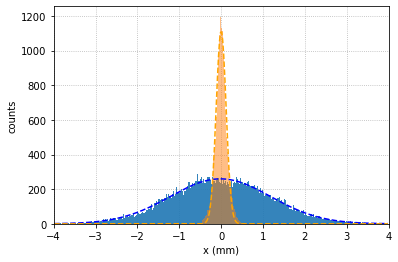

In [6]:
## tic = time.time()

# ----- x position reconstruction: Det Thick ----- #
xpos_aux = det_thick[['eventID','dE','xpos']].copy()
xpos_aux['xpos_weighted'] = xpos_aux['dE'] * xpos_aux['xpos']/1e3
xpos_det_thick = xpos_aux.groupby('eventID')['xpos_weighted'].sum() / xpos_aux.groupby('eventID')['dE'].sum()

# ----- x position reconstruction: Det Coinc ----- #
xpos_aux = detA_coinc[['eventID','dE','xpos']].copy()
xpos_aux['xpos_weighted'] = xpos_aux['dE']* xpos_aux['xpos']/1e3
xpos_detA_coinc = xpos_aux.groupby('eventID')['xpos_weighted'].sum() / xpos_aux.groupby('eventID')['dE'].sum()

E_detA_coinc = np.array(detA_coinc.iloc[events_coinc_detA_idx]['E']) - np.array(detA_coinc.groupby('eventID')['E'].last())

xpos_aux = detB_coinc[['eventID','dE','xpos']].copy()
xpos_aux['xpos_weighted'] = xpos_aux['dE']* xpos_aux['xpos']/1e3
xpos_detB_coinc = xpos_aux.groupby('eventID')['xpos_weighted'].sum() / xpos_aux.groupby('eventID')['dE'].sum()

E_detB_coinc = np.array(detB_coinc.iloc[events_coinc_detB_idx]['E']) - np.array(detB_coinc.groupby('eventID')['E'].last())

xpos_coinc = (np.array(xpos_detA_coinc)*E_detB_coinc + np.array(xpos_detB_coinc)*E_detA_coinc)/(E_detA_coinc+E_detB_coinc)
# xpos_coinc = (np.array(xpos_detA_coinc)+np.array(xpos_detB_coinc))*.5



#### -------------- Gaussian Fit -------------- ####

bin_min = -4
bin_max = 4
bin_res = .025
BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)

plt.figure(1)
plt.rc('axes', axisbelow=True)
plt.hist(xpos_det_thick,bins=BINS, label='1_track (1 \u03BCm thick)', alpha=.9)
n,x,_ = plt.hist(xpos_coinc,bins=BINS,label='2_track', alpha=.5)
bin_centers = 0.5*(x[1:]+x[:-1])

    
plt.grid(linestyle=':')
plt.xlim([bin_min,bin_max]);
xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(xlim[0],xlim[1],int(abs(xlim[0])+abs(xlim[0])+1)));
plt.xlabel('x (mm)');
plt.ylabel('counts');
    

# --- Gaussian fit definition --- #

from scipy.optimize import curve_fit
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


# --- det Thick --- # 

hist, bin_edges = np.histogram(xpos_det_thick, BINS)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 1.])
hist_fit_detThick = gauss(bin_centres, *coeff)

FWHM_A = abs(2.355*coeff[2])
RSS = sum((hist-hist_fit_detThick)**2); TSS = sum((hist-np.mean(hist))**2)
R2 = 1-RSS/TSS

plt.plot(bin_centres,hist_fit_detThick,'--',color='blue', label='Gauss fit (R\u00B2=' + str(round(np.sqrt(R2),3)) + ')'  );

xnote = .7; ynote = plt.gca().get_ylim()[1]*2.5/5
str_note = 'FWHM(1_track) = ' + str(round(FWHM_A,2)) + ' mm';
# plt.annotate(str_note,(xnote,ynote))

print('det Thick --> x = ' + str(round(coeff[1],5)) + ' mm')
print('      --> FWHM = ' + str(round(FWHM_A,4)) + ' mm (R\u00B2 = ' + str(round(np.sqrt(R2),4)) + ')')


# --- det Coinc --- # 

hist, bin_edges = np.histogram(xpos_coinc, BINS)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 1.])
hist_fit_coinc = gauss(bin_centres, *coeff)

FWHM_AB = abs(2.355*coeff[2])
RSS = sum((hist-hist_fit_coinc)**2); TSS = sum((hist-np.mean(hist))**2)
R2 = 1-RSS/TSS

plt.plot(bin_centres,hist_fit_coinc,'--',color='orange', label='Gauss fit (R\u00B2=' + str(round(np.sqrt(R2),3)) + ')'  );

yspace = plt.gca().get_ylim()[1]/15;
str_note = 'FWHM(2_track) = ' + str(round(FWHM_AB,2)) + ' mm';
# plt.annotate(str_note,(xnote,ynote+yspace))

print('\ndet Coinc --> x = ' + str(round(coeff[1],5)) + ' mm')
print('\t--> FWHM = ' + str(round(FWHM_AB,4)) + ' mm (R\u00B2 = ' + str(round(np.sqrt(R2),4)) + ')')

print('\n Improvement Factor: FWHM(thick) / FWHM(coinc) = ' + str(round(FWHM_A/FWHM_AB,2)))

handles, labels = plt.gca().get_legend_handles_labels()
order = [3,2,1,0]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]);

# plt.legend(('arithmetic mean','E weighted average'),loc='upper right')
# plt.figure(2)
# savename = 'newimages/'+figure_name+'_dEweightAvg'+'_GaussFit_'+str(N_captures)+'NeutronCaptures'
plt.savefig('Fig7-left.svg', dpi=300);

In [7]:
# ----- x position reconstruction: Det Coinc ----- #
xpos_aux = detA[['eventID','dE','xpos']].copy()
xpos_aux['xpos_weighted'] = xpos_aux['dE']* xpos_aux['xpos']/1e3
xpos_detA = xpos_aux.groupby('eventID')['xpos_weighted'].sum() / xpos_aux.groupby('eventID')['dE'].sum()

E_detA = np.array(detA.iloc[events_detA_idx]['E']) - np.array(detA.groupby('eventID')['E'].last())

xpos_aux = detB[['eventID','dE','xpos']].copy()
xpos_aux['xpos_weighted'] = xpos_aux['dE']* xpos_aux['xpos']/1e3
xpos_detB = xpos_aux.groupby('eventID')['xpos_weighted'].sum() / xpos_aux.groupby('eventID')['dE'].sum()

E_detB = np.array(detB.iloc[events_detB_idx]['E']) - np.array(detB.groupby('eventID')['E'].last())


det A --> x = -0.00385 mm
	    --> FWHM = 2.7906 mm (R² = 0.9797)

det B --> x = 0.00991 mm
	    --> FWHM = 2.7779 mm (R² = 0.9794)


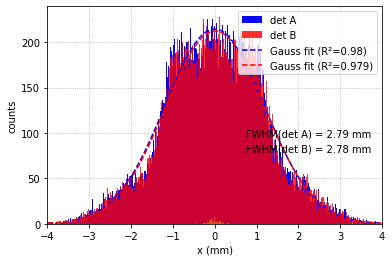

In [22]:
# --- det coinc A & B --- # 

bin_min = -4
bin_max = 4
bin_res = .025
BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)

plt.figure(1)
plt.rc('axes', axisbelow=True)
plt.hist(xpos_detA,bins=BINS, label='det A', alpha=.99,color='blue')
plt.hist(xpos_detB,bins=BINS,label='det B', alpha=.8,color='red')
n,x,_ = plt.hist(xpos_coinc,bins=BINS,label='2_track',color='orange', alpha=.5)

bin_centers = 0.5*(x[1:]+x[:-1])

plt.grid(linestyle=':')
plt.xlim([bin_min,bin_max]);
xlim = plt.gca().get_xlim()
plt.xticks(np.linspace(xlim[0],xlim[1],int(abs(xlim[0])+abs(xlim[0])+1)));
plt.xlabel('x (mm)');
plt.ylabel('counts');

#### -------------- Gaussian Fit -------------- ####


# # --- Lorentzian fit --- #
# def lorentzian( x, *p):
#     a, x0, gam = p
#     return a * gam**2 / ( gam**2 + ( x - x0 )**2)




# --- det A --- # 

hist, bin_edges = np.histogram(xpos_detA, BINS)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 1.])
hist_fit_coinc = gauss(bin_centres, *coeff)

FWHM_A = abs(2.355*coeff[2])
RSS = sum((hist-hist_fit_coinc)**2); TSS = sum((hist-np.mean(hist))**2)
R2 = 1-RSS/TSS

plt.plot(bin_centres,hist_fit_coinc,'--',color='blue', label='Gauss fit (R\u00B2=' + str(round(np.sqrt(R2),3)) + ')'  );

print('\ndet A --> x = ' + str(round(coeff[1],5)) + ' mm')
print('\t    --> FWHM = ' + str(round(FWHM_A,4)) + ' mm (R\u00B2 = ' + str(round(np.sqrt(R2),4)) + ')')


xnote = .75; ynote = plt.gca().get_ylim()[1]*2/5
str_note = 'FWHM(det A) = ' + str(round(FWHM_A,2)) + ' mm'; plt.annotate(str_note,(xnote,ynote))

# --- det B --- # 

hist, bin_edges = np.histogram(xpos_detB, BINS)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 1.])
hist_fit_coinc = gauss(bin_centres, *coeff)

FWHM_B = abs(2.355*coeff[2])
RSS = sum((hist-hist_fit_coinc)**2); TSS = sum((hist-np.mean(hist))**2)
R2 = 1-RSS/TSS

plt.plot(bin_centres,hist_fit_coinc,'--',color='red', label='Gauss fit (R\u00B2=' + str(round(np.sqrt(R2),3)) + ')'  );

print('\ndet B --> x = ' + str(round(coeff[1],5)) + ' mm')
print('\t    --> FWHM = ' + str(round(FWHM_B,4)) + ' mm (R\u00B2 = ' + str(round(np.sqrt(R2),4)) + ')')

yspace = plt.gca().get_ylim()[1]/15;
str_note = 'FWHM(det B) = ' + str(round(FWHM_B,2)) + ' mm'; plt.annotate(str_note,(xnote,ynote-yspace))


# --- det Coinc --- # 

# hist, bin_edges = np.histogram(xpos_coinc, BINS)
# bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 1.])
# hist_fit_coinc = gauss(bin_centres, *coeff)

# FWHM_AB = abs(2.355*coeff[2])
# RSS = sum((hist-hist_fit_coinc)**2); TSS = sum((hist-np.mean(hist))**2)
# R2 = 1-RSS/TSS

# plt.plot(bin_centres,hist_fit_coinc,'--',color='orange', label='Gauss fit (R\u00B2=' + str(round(np.sqrt(R2),3)) + ')'  );

# yspace = plt.gca().get_ylim()[1]/15;
# str_note = 'FWHM(2_track) = ' + str(round(FWHM_AB,2)) + ' mm'; plt.annotate(str_note,(xnote,ynote-yspace*2))

# print('\ndet Coinc --> x = ' + str(round(coeff[1],5)) + ' mm')
# print('\t    --> FWHM = ' + str(round(FWHM_AB,4)) + ' mm (R\u00B2 = ' + str(round(np.sqrt(R2),4)) + ')')



handles, labels = plt.gca().get_legend_handles_labels()
order = [2,3,0,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]);

plt.savefig('imsave_A_B_coinc.svg', dpi=300);

# Position reconstruction in Loop

In [9]:
# --- Create Shuffle arrays --- #

xpos_det_thick_shuffled = np.copy(xpos_det_thick)
xpos_coinc_shuffled = np.copy(xpos_coinc)

In [10]:
#### RANDOM NUMBER OF NEUTRON CAPTURES ####

# --- Shuffle xpos --- #

len_N_captures_array = 23
N_series = int(10000)
output_array = np.zeros([4,N_series])


N_captures_thick_array = np.zeros(N_series);
N_captures_coinc_array = np.zeros(N_series)

for SEED in range(0,N_series):
    print('seed: ' + str(SEED), end='\r')

    np.random.seed(SEED)
    np.random.shuffle(xpos_det_thick_shuffled)
    np.random.shuffle(xpos_coinc_shuffled)

    
    # Generate random capture number for detector in a log distribution

    
    N_captures_thick = 0;
    while ( (N_captures_thick<10) | (N_captures_thick > len(xpos_det_thick_shuffled)) ):
        N_captures_thick = round(np.random.lognormal(mean=4, sigma=2.5))
   
    N_captures_coinc = 0;
    while ( (N_captures_coinc<10) | (N_captures_coinc > len(xpos_coinc_shuffled)) ):
        N_captures_coinc = round(np.random.lognormal(mean=3.5, sigma=2))    
    
    xpos_det_thick = xpos_det_thick_shuffled[:N_captures_thick]
    xpos_coinc = xpos_coinc_shuffled[:N_captures_coinc]



    #### -------------- Gaussian Fit -------------- ####

    bin_min = -4
    bin_max = 4
    bin_res = .02
    BINS = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1)


    # --- Gaussian fit definition --- #

    from scipy.optimize import curve_fit
    def gauss(x, *p):
        A, mu, sigma = p
        return A*np.exp(-(x-mu)**2/(2.*sigma**2))

    # --- det Thick --- # 

    hist, bin_edges = np.histogram(xpos_det_thick, BINS)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

    coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 1.], maxfev=20000 )
    hist_fit_detThick = gauss(bin_centres, *coeff)

    FWHM_A = abs(2.355*coeff[2])
    RSS = sum((hist-hist_fit_detThick)**2); TSS = sum((hist-np.mean(hist))**2)
    R2 = 1-RSS/TSS

    estimated_x_thick = round(coeff[1],5)
    estimated_FWHM_thick = round(FWHM_A,4)

    # --- det Coinc --- # 

    hist, bin_edges = np.histogram(xpos_coinc, BINS)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

    coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=[max(hist), round(np.mean(bin_edges)), 1.],maxfev=20000 )
    hist_fit_coinc = gauss(bin_centres, *coeff)

    FWHM_AB = abs(2.355*coeff[2])
    RSS = sum((hist-hist_fit_coinc)**2); TSS = sum((hist-np.mean(hist))**2)
    R2 = 1-RSS/TSS

    
    estimated_x_coinc = round(coeff[1],5)
    estimated_FWHM_coinc = round(FWHM_AB,4)

    output_array[0,SEED] = estimated_x_thick
    output_array[1,SEED] = estimated_FWHM_thick
    output_array[2,SEED] = estimated_x_coinc
    output_array[3,SEED] = estimated_FWHM_coinc

    N_captures_thick_array[SEED] = N_captures_thick
    N_captures_coinc_array[SEED] = N_captures_coinc


    ## END of seed loop
    

output_Ncaptures = [N_captures_thick_array,N_captures_coinc_array]

output_Ncaptures = np.transpose(output_Ncaptures)  
output_array = np.transpose(output_array)

import csv
f = open('csv_file', 'w')
writer = csv.writer(f)
writer.writerows(output_array)
f.close()

f = open('csv_file_Ncap', 'w')
writer = csv.writer(f)
writer.writerows(output_Ncaptures)
f.close()

print('\n DONE')

seed: 9999
 DONE


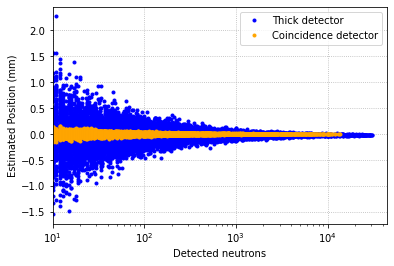

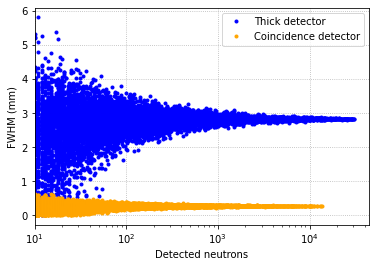

In [11]:
plt.figure(1)
plt.plot(N_captures_thick_array , output_array[:,0],'.', color='blue'); 
plt.plot(N_captures_coinc_array , output_array[:,2],'.', color='orange');

plt.xscale('log'), plt.grid(linestyle=':')
plt.xlabel('Detected neutrons'), plt.ylabel('Estimated Position (mm)')
plt.legend(['Thick detector','Coincidence detector'],loc = "upper right");
plt.xlim([10,4.5e4])



plt.figure(2)
plt.plot(N_captures_thick_array , output_array[:,1],'.', color='blue');
plt.plot(N_captures_coinc_array , output_array[:,3],'.',color='orange');


plt.xscale('log'), plt.grid(linestyle=':')
plt.xlabel('Detected neutrons'), plt.ylabel('FWHM (mm)')
plt.legend(['Thick detector','Coincidence detector'],loc = "upper right");
plt.xlim([10,4.5e4]);

# Range and dE/dx

In [12]:
# # # ----- Stopping Power ----- #
# # dEdr_detA = detA['dE'].loc[(detA['dr']>0)]/detA['dr'].loc[(detA['dr']>0)]*1e3 # keV/mm
# # dEdx_detA = detA['dE'].loc[(detA['dx']>0)]/detA['dx'].loc[(detA['dx']>0)]*1e3 # keV/mm

# # dEdr_detA_alpha = detA_alpha['dE'].loc[(detA_alpha['dr']>0)]/detA_alpha['dr'].loc[(detA_alpha['dr']>0)]*1e3 # keV/mm
# # dEdx_detA_alpha = detA_alpha['dE'].loc[(detA_alpha['dx']>0)]/detA_alpha['dx'].loc[(detA_alpha['dx']>0)]*1e3 # keV/mm

# # dEdr_detA_Li = detA_Li['dE'].loc[(detA_Li['dr']>0)]/detA_Li['dr'].loc[(detA_Li['dr']>0)]*1e3 # keV/mm
# # dEdx_detA_Li = detA_Li['dE'].loc[(detA_Li['dx']>0)]/detA_Li['dx'].loc[(detA_Li['dx']>0)]*1e3 # keV/mm


# # ----- Range ----- #
# ranges_detThick = np.array(det_thick.iloc[events_det_thick_idx-1]['dr_cum']/1e3)
# ranges_detThick = np.append(ranges_detThick[1:],ranges_detThick[0])

# ranges_detThick_alpha = np.array(det_thick_alpha.iloc[events_det_thick_alpha_idx-1]['dr_cum']/1e3)
# ranges_detThick_alpha = np.append(ranges_detThick_alpha[1:],ranges_detThick_alpha[0])

# ranges_detThick_Li = np.array(det_thick_Li.iloc[events_det_thick_Li_idx-1]['dr_cum']/1e3)
# ranges_detThick_Li = np.append(ranges_detThick_Li[1:],ranges_detThick_Li[0])


In [13]:
# # ------- Plot Range on same figure -------
# bin_min = 0
# bin_max = 12
# bin_res = .05

# plt.figure()
# plt.rc('axes', axisbelow=True)
# plt.grid(linestyle=':')


# ranges_detThick = np.array(det_thick.iloc[events_det_thick_idx-1]['dr_cum']/1e3)
# ranges_detThick = np.append(ranges_detThick[1:],ranges_detThick[0])

# ranges_detThick_alpha = np.array(det_thick_alpha.iloc[events_det_thick_alpha_idx-1]['dr_cum']/1e3)
# ranges_detThick_alpha = np.append(ranges_detThick_alpha[1:],ranges_detThick_alpha[0])

# ranges_detThick_Li = np.array(det_thick_Li.iloc[events_det_thick_Li_idx-1]['dr_cum']/1e3)
# ranges_detThick_Li = np.append(ranges_detThick_Li[1:],ranges_detThick_Li[0])


# plt.hist(ranges_detThick_alpha,
#          bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
#          weights = ranges_detThick_alpha/sum(ranges_detThick),
#          color='r',alpha = .7);

# plt.hist(ranges_detThick_Li,
#          bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
#          weights = ranges_detThick_Li/sum(ranges_detThick),
#          color='b',alpha = .7);

# h = np.histogram(ranges_detThick,
#          bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
#          weights = ranges_detThick/sum(ranges_detThick))
# plt.plot(h[1][1:]-bin_res/2,h[0],color='k');


# ylim = plt.gca().get_ylim()
# plt.ylim([0,ylim[1]]);

# plt.xlim([bin_min,bin_max]);
# xlim = plt.gca().get_xlim()
# plt.xticks(np.linspace(xlim[0],xlim[1],int(xlim[1])+1));

# plt.gca().axes.yaxis.set_ticklabels([]);
# plt.xlabel('range (mm)');
# plt.ylabel('Prob. density function');
# plt.title('Thick detector');
# plt.legend(('Total','\u03B1 particle','\u2077Li particle'));

# # plt.savefig('range_total', dpi=300)

In [14]:
# # ------- Plot Range on same figure -------       X coordinate
# bin_min = 0
# bin_max = 10
# bin_res = .05

# plt.figure()
# plt.rc('axes', axisbelow=True)
# plt.grid(linestyle=':')


# # --- total ---
# pos_offset = min(det_thick['xpos']) # compensate min() and max() calculation when track has negative xpos valies

# xmin = det_thick.groupby('eventID')['xpos'].min()+pos_offset  #xmin and xmax are always positive
# xmax = det_thick.groupby('eventID')['xpos'].max()+pos_offset
# xposmax_det_thick = (xmax-xmin)/1e3

# h = np.histogram(xposmax_det_thick,
#          bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
#          weights = abs(xposmax_det_thick)/sum(abs(xposmax_det_thick)))
# plt.plot(h[1][1:]-bin_res/2,h[0],color='k');


# # --- alpha ---
# xmin = det_thick.loc[(det_thick['PID']=='alpha')].groupby('eventID')['xpos'].min()+pos_offset  #xmin and xmax are always positive
# xmax = det_thick.loc[(det_thick['PID']=='alpha')].groupby('eventID')['xpos'].max()+pos_offset
# xposmax_det_thick_alpha = (xmax-xmin)/1e3

# plt.hist(xposmax_det_thick_alpha,
#          bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
#          weights = abs(xposmax_det_thick_alpha)/sum(abs(xposmax_det_thick)),
#          color='r',alpha = .7);

# # --- Li ---
# xmin = det_thick.loc[(det_thick['PID']=='Li7')].groupby('eventID')['xpos'].min()+pos_offset  #xmin and xmax are always positive
# xmax = det_thick.loc[(det_thick['PID']=='Li7')].groupby('eventID')['xpos'].max()+pos_offset
# xposmax_det_thick_Li = (xmax-xmin)/1e3

# plt.hist(xposmax_det_thick_Li,
#          bins = np.linspace(bin_min,bin_max,int((bin_max-bin_min)/bin_res)+1),
#          weights = abs(xposmax_det_thick_Li)/sum(abs(xposmax_det_thick)),
#          color='b',alpha = .7);



# plt.gca().axes.yaxis.set_ticklabels([]);
# plt.xlabel('x (mm)');
# plt.ylabel('Prob. density function');
# plt.title('Thick detector');
# plt.legend(('Total','\u03B1 particle','\u2077Li particle'));


# anotation_str = ' mean = ' + str(round(np.average(xposmax_det_thick),2)) + ' mm'
# plt.annotate(anotation_str,(np.average(xposmax_det_thick),max(h[0])*1.05));
# plt.plot([np.average(xposmax_det_thick), np.average(xposmax_det_thick)] , [0,max(h[0])*1.1],'k--')



# ylim = plt.gca().get_ylim()
# plt.ylim([0,ylim[1]]);
# plt.xlim([bin_min,bin_max]);
# xlim = plt.gca().get_xlim()
# plt.xticks(np.linspace(xlim[0],xlim[1],int(xlim[1])+1));

# #plt.savefig('range_x_thick_labeled', dpi=300)

# Visualize tracks

KeyError: 'zpos'

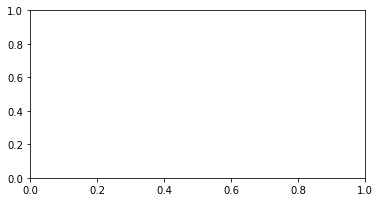

In [15]:
import matplotlib.lines as mlines
fig1, ax = plt.subplots()
ax.set_box_aspect(.5)

N = 63

for N in range(N,N+1):
    print('N = ' + str(N),end="\r")
    xTrack_alpha = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['xpos'];
    zTrack_alpha = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['zpos'];
    xTrack_Li7 = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='Li7']['xpos'];
    zTrack_Li7 = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='Li7']['zpos'];
    
    dE_alpha = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['dE'];
    dE_Li7 = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='Li7']['dE'];
    

    plt.plot(xTrack_alpha/1e3,zTrack_alpha/1e3,'r', alpha = .8, markersize = .1);
    plt.plot(xTrack_Li7/1e3,zTrack_Li7/1e3, 'b', alpha = .8, markersize = .1);

plt.xlabel('x (mm)');
plt.ylabel('z (mm)');
plt.ylim(-4,4); plt.yticks(range(-4, 4+1, 2))
plt.xlim(-4,4); plt.xticks(range(-4, 4+1, 2))

red_line = mlines.Line2D([], [], color='red', label='\u03B1');
blue_line = mlines.Line2D([], [], color='blue', label='\u2077Li');
plt.legend(handles=[red_line,blue_line]);

# plt.savefig('det_thick_track_'+str(N), dpi=300)

In [ ]:
# xTrack_alpha


# import csv
# f = open('csv_file', 'w')
# writer = csv.writer(f)
# writer.writerows(np.transpose([zTrack_Li7.values, dE_Li7.values]))
# f.close()



In [ ]:
# fig1, ax = plt.subplots()
# ax.set_box_aspect(1)


# N = 63


# for N in range(N,N+1):
#     print('N = ' + str(N),end="\r")
#     xTrack_alpha = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['xpos'];
#     zTrack_alpha = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['zpos'];
#     xTrack_Li7 = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='Li7']['xpos'];
#     zTrack_Li7 = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='Li7']['zpos'];

#     plt.plot(xTrack_alpha/1e3,zTrack_alpha/1e3,'r', alpha = .8, markersize = .1);
#     plt.plot(xTrack_Li7/1e3,zTrack_Li7/1e3, 'b', alpha = .8, markersize = .1);
    
    
# plt.xlabel('x (mm)');
# plt.ylabel('z (mm)');
# plt.ylim(-4,4);  plt.yticks(range(-4, 4+1, 1))
# plt.xlim(-4,4); plt.xticks(range(-4, 4+1, 1))

# red_line = mlines.Line2D([], [], color='red', label='\u03B1');
# blue_line = mlines.Line2D([], [], color='blue', label='\u2077Li');
# plt.legend(handles=[red_line,blue_line]);

# plt.savefig('det_coinc_track_'+str(N), dpi=300)

# E = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['E']
# dE = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['dE']
# dx = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['dx']
# xpos = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['xpos']/1e3
# dx_cum = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['dx_cum']/1e3

# plt.figure()
# plt.plot(dx_cum,E,'r')

# E = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='Li7']['E']
# dE = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='Li7']['dE']
# dx = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='Li7']['dx']
# xpos = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='Li7']['xpos']/1e3
# dx_cum = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='Li7']['dx_cum']/1e3

# # plt.figure()
# plt.plot(dx_cum,E)
# plt.xlabel('x (mm)');
# plt.ylabel('E (keV)');
# plt.xlim(0,4);
# plt.ylim(0,850);
# plt.legend(handles=[red_line,blue_line]);
# plt.grid()

# plt.savefig('det_coinc_track_'+str(N)+'_E_vs_x', dpi=300)


In [ ]:
# A_cum = 0;
# for index in range(0,len(dx_cum)-1):
#     A_cum = A_cum + (dx_cum.iloc[index+1]-dx_cum.iloc[index])*max(E.iloc[index],E.iloc[index+1]) - 0.5* (dx_cum.iloc[index+1]-dx_cum.iloc[index])*(max(E.iloc[index],E.iloc[index+1]) - min(E.iloc[index],E.iloc[index+1]))

# A_left = 0;
# for index in range(0,len(dx_cum)-1):
#     A_left = A_left + (dx_cum.iloc[index+1]-dx_cum.iloc[index])*max(E.iloc[index],E.iloc[index+1]) - 0.5* (dx_cum.iloc[index+1]-dx_cum.iloc[index])*(max(E.iloc[index],E.iloc[index+1]) - min(E.iloc[index],E.iloc[index+1]))
#     print('Area left = ' + str(round(A_left,3)), end=' | ')
#     print('Area right = '+ str(round(A_cum-A_left,3)), end=' | ')
#     print('X =  '+ str(round(dx_cum.iloc[index],3)) + ' mm')

In [ ]:
# for index in range(0,len(dx_cum)):
#     index += 1;
#     area_left = trapz(dx_cum[:index], x=dx_cum[:index])
#     area_right = trapz(dx_cum[index:], x=dx_cum[index:-1])   
#     if (area_left>=area_right):
#         break
# area_left = trapz(dx_cum[0][:index], x=dx_cum[1][:index])
# area_right = trapz(dx_cum[0][index:], x=dx_cum[1][index:-1])
# print('Area left = ' + str(round(area_left,3)), end=' | ')
# print('Area right = '+ str(round(area_right,3)))

# plt.fill_between(dx_cum[1][:index+1],dx_cum[0][:index+1],color='b',alpha=.4);
# plt.fill_between(dx_cum[1][index:-1],dx_cum[0][index:],color='b',alpha=.1);

# anotation_str = 'd\u2085\u2080 = ' + str(round((dx_cum[1][index]),2)) + ' mm'
# plt.annotate(anotation_str,(dx_cum[1][index],dx_cum[0][index]*1.1));

In [ ]:
# dE = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['dE']
# dx = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['dx']
# xpos = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['xpos']/1e3
# dx_cum = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['dx_cum']/1e3

# plt.figure()
# plt.hist(-xpos,weights = dE/dx,bins = 25);

# dE = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='Li7']['dE']
# dx = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='Li7']['dx']
# xpos = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='Li7']['xpos']/1e3
# dx_cum = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='Li7']['dx_cum']/1e3

# plt.figure()
# plt.hist(xpos,weights = dE/dx,bins = 25);


In [ ]:
# dE = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['dE']
# dx = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['dx']
# xpos = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['xpos']/1e3
# dx_cum = detCoinc.loc[detCoinc['eventID'].isin(events_coinc[N-1:N])].loc[detCoinc['PID']=='alpha']['dx_cum']/1e3

# plt.plot(dx_cum,dE/dx,'-')

In [ ]:
# x_estimate = sum(dE*xpos)/sum(dE)
# print(x_estimate)

In [ ]:
# # ----- x position reconstruction: Det Thick ----- #
# xpos_aux = det_thick[['eventID','dE','xpos']].copy()
# xpos_aux['xpos_weighted'] = xpos_aux['dE'] * xpos_aux['xpos']/1e3
# xpos_det_thick = xpos_aux.groupby('eventID')['xpos_weighted'].sum() / xpos_aux.groupby('eventID')['dE'].sum()

# # ----- x position reconstruction: Det Coinc ----- #
# xpos_aux = detA_coinc[['eventID','dE','xpos']].copy()
# xpos_aux['xpos_weighted'] = xpos_aux['dE']* xpos_aux['xpos']/1e3
# xpos_detA_coinc = xpos_aux.groupby('eventID')['xpos_weighted'].sum() / xpos_aux.groupby('eventID')['dE'].sum()


# E_detA_coinc = np.array(detA_coinc.iloc[events_coinc_detA_idx]['E']) - np.array(detA_coinc.groupby('eventID')['E'].last())

# xpos_aux = detB_coinc[['eventID','dE','xpos']].copy()
# xpos_aux['xpos_weighted'] = xpos_aux['dE']* xpos_aux['xpos']/1e3
# xpos_detB_coinc = xpos_aux.groupby('eventID')['xpos_weighted'].sum() / xpos_aux.groupby('eventID')['dE'].sum()

# E_detB_coinc = np.array(detB_coinc.iloc[events_coinc_detB_idx]['E']) - np.array(detB_coinc.groupby('eventID')['E'].last())

# xpos_coinc = (np.array(xpos_detA_coinc)*E_detB_coinc + np.array(xpos_detB_coinc)*E_detA_coinc)/(E_detA_coinc+E_detB_coinc)
